### World Educational Data

👆 [Dataset on Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/world-educational-data)

_The original datased contained incorrect Latitude and Longitude values for some countries. I have corrected them in the dataset used in this notebook._


In [94]:
import pandas as pd

df = pd.read_csv("./global_education.csv")

In [95]:
df.head(10)

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.00,65.000000,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.00,20.000000,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.00,3.000000,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.50,1.500000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,-12.50,18.500000,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89
5,Anguilla,18.25,-63.166667,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0.00,0.0,0.0,0.00
6,Antigua and Barbuda,17.05,-61.800000,14,4,4,1,1,2,14,...,0,0,0,0,0,0,15.33,105.0,24.8,0.00
7,Argentina,-34.00,-64.000000,2,2,0,0,0,0,15,...,46,56,48,31,99,100,17.02,109.7,90.0,9.79
8,Armenia,40.00,45.000000,52,50,9,9,11,9,16,...,0,55,0,50,0,0,13.99,92.7,54.6,16.99
9,Australia,-27.00,133.000000,13,14,0,0,2,3,10,...,0,64,80,78,0,0,12.60,100.3,113.1,5.27


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

In [97]:
import matplotlib.pyplot as plt

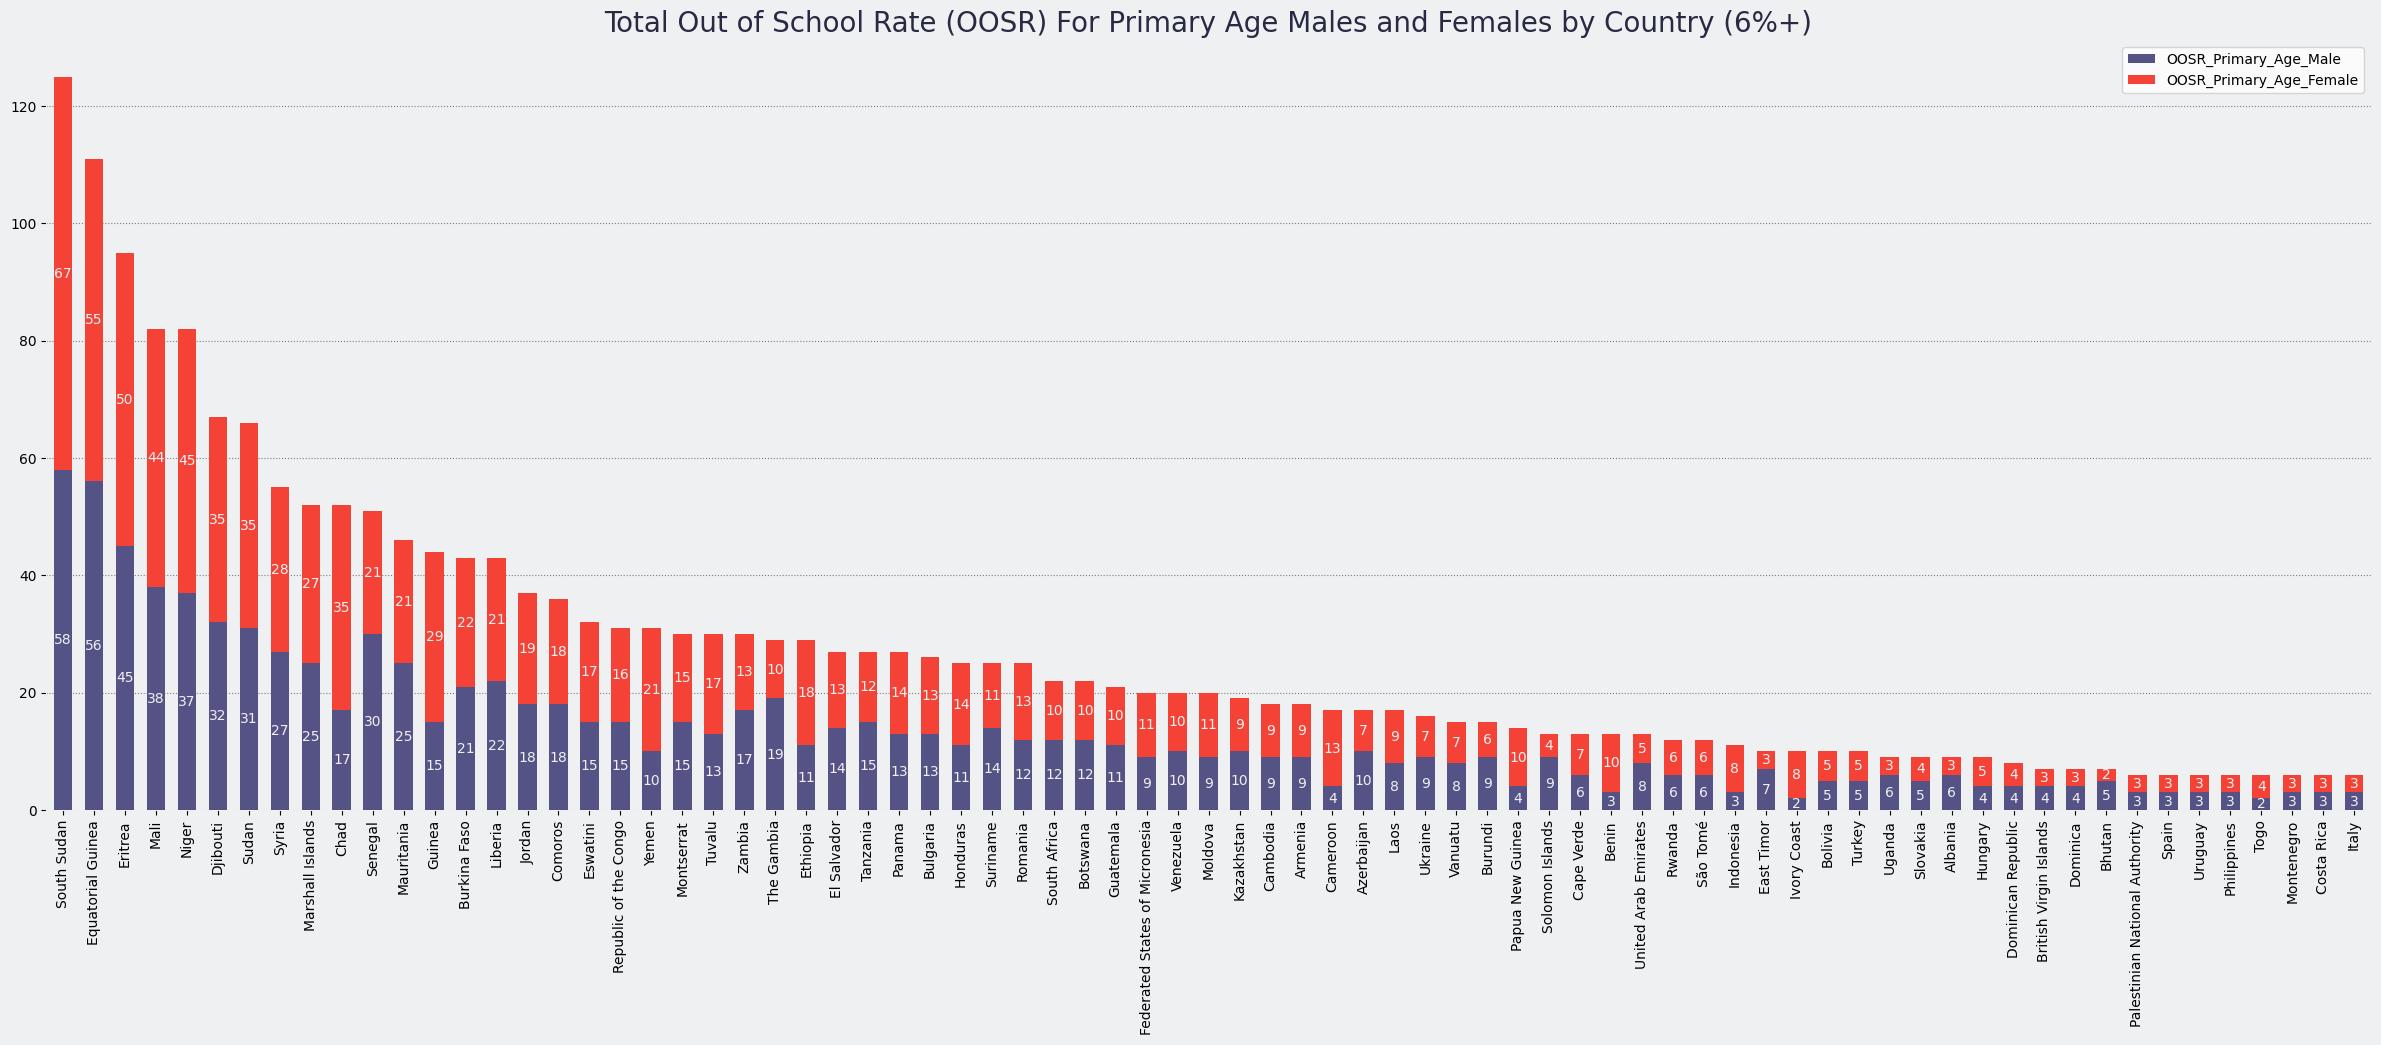

In [98]:
df["Total_OOSR_Primary_Age"] = (
    df["OOSR_Primary_Age_Male"] + df["OOSR_Primary_Age_Female"]
)

sorted_df = (
    df.groupby("Countries and areas")[
        [
            "OOSR_Primary_Age_Male",
            "OOSR_Primary_Age_Female",
            "Total_OOSR_Primary_Age",
        ]
    ]
    .sum()
    .sort_values(by="Total_OOSR_Primary_Age", ascending=False)
)

plt.figure(figsize=(30, 10), facecolor="#EFF0F2")


ax = plt.gca()


ax.set_facecolor("#EFF0F2")


for spine in ax.spines.values():
    spine.set_edgecolor("#EFF0F2")


sorted_df.head(75).plot(
    kind="bar",
    color=["#555386", "#F44336"],
    y=["OOSR_Primary_Age_Male", "OOSR_Primary_Age_Female"],
    stacked=True,
    ax=ax,
    width=0.6,
    zorder=3,
)


plt.title(
    "Total Out of School Rate (OOSR) For Primary Age Males and Females by Country (6%+)",
    color="#282943",
    fontsize=20,
)

plt.grid(axis="y", linestyle=":", zorder=0, color="#857C79")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_y() + p.get_height() / 2,
        f"{int(p.get_height()):,}",
        ha="center",
        va="center",
        fontsize=10,
        color="#EFF0F2",
    )

plt.xlabel("")
ax.legend(loc="best")
plt.show()

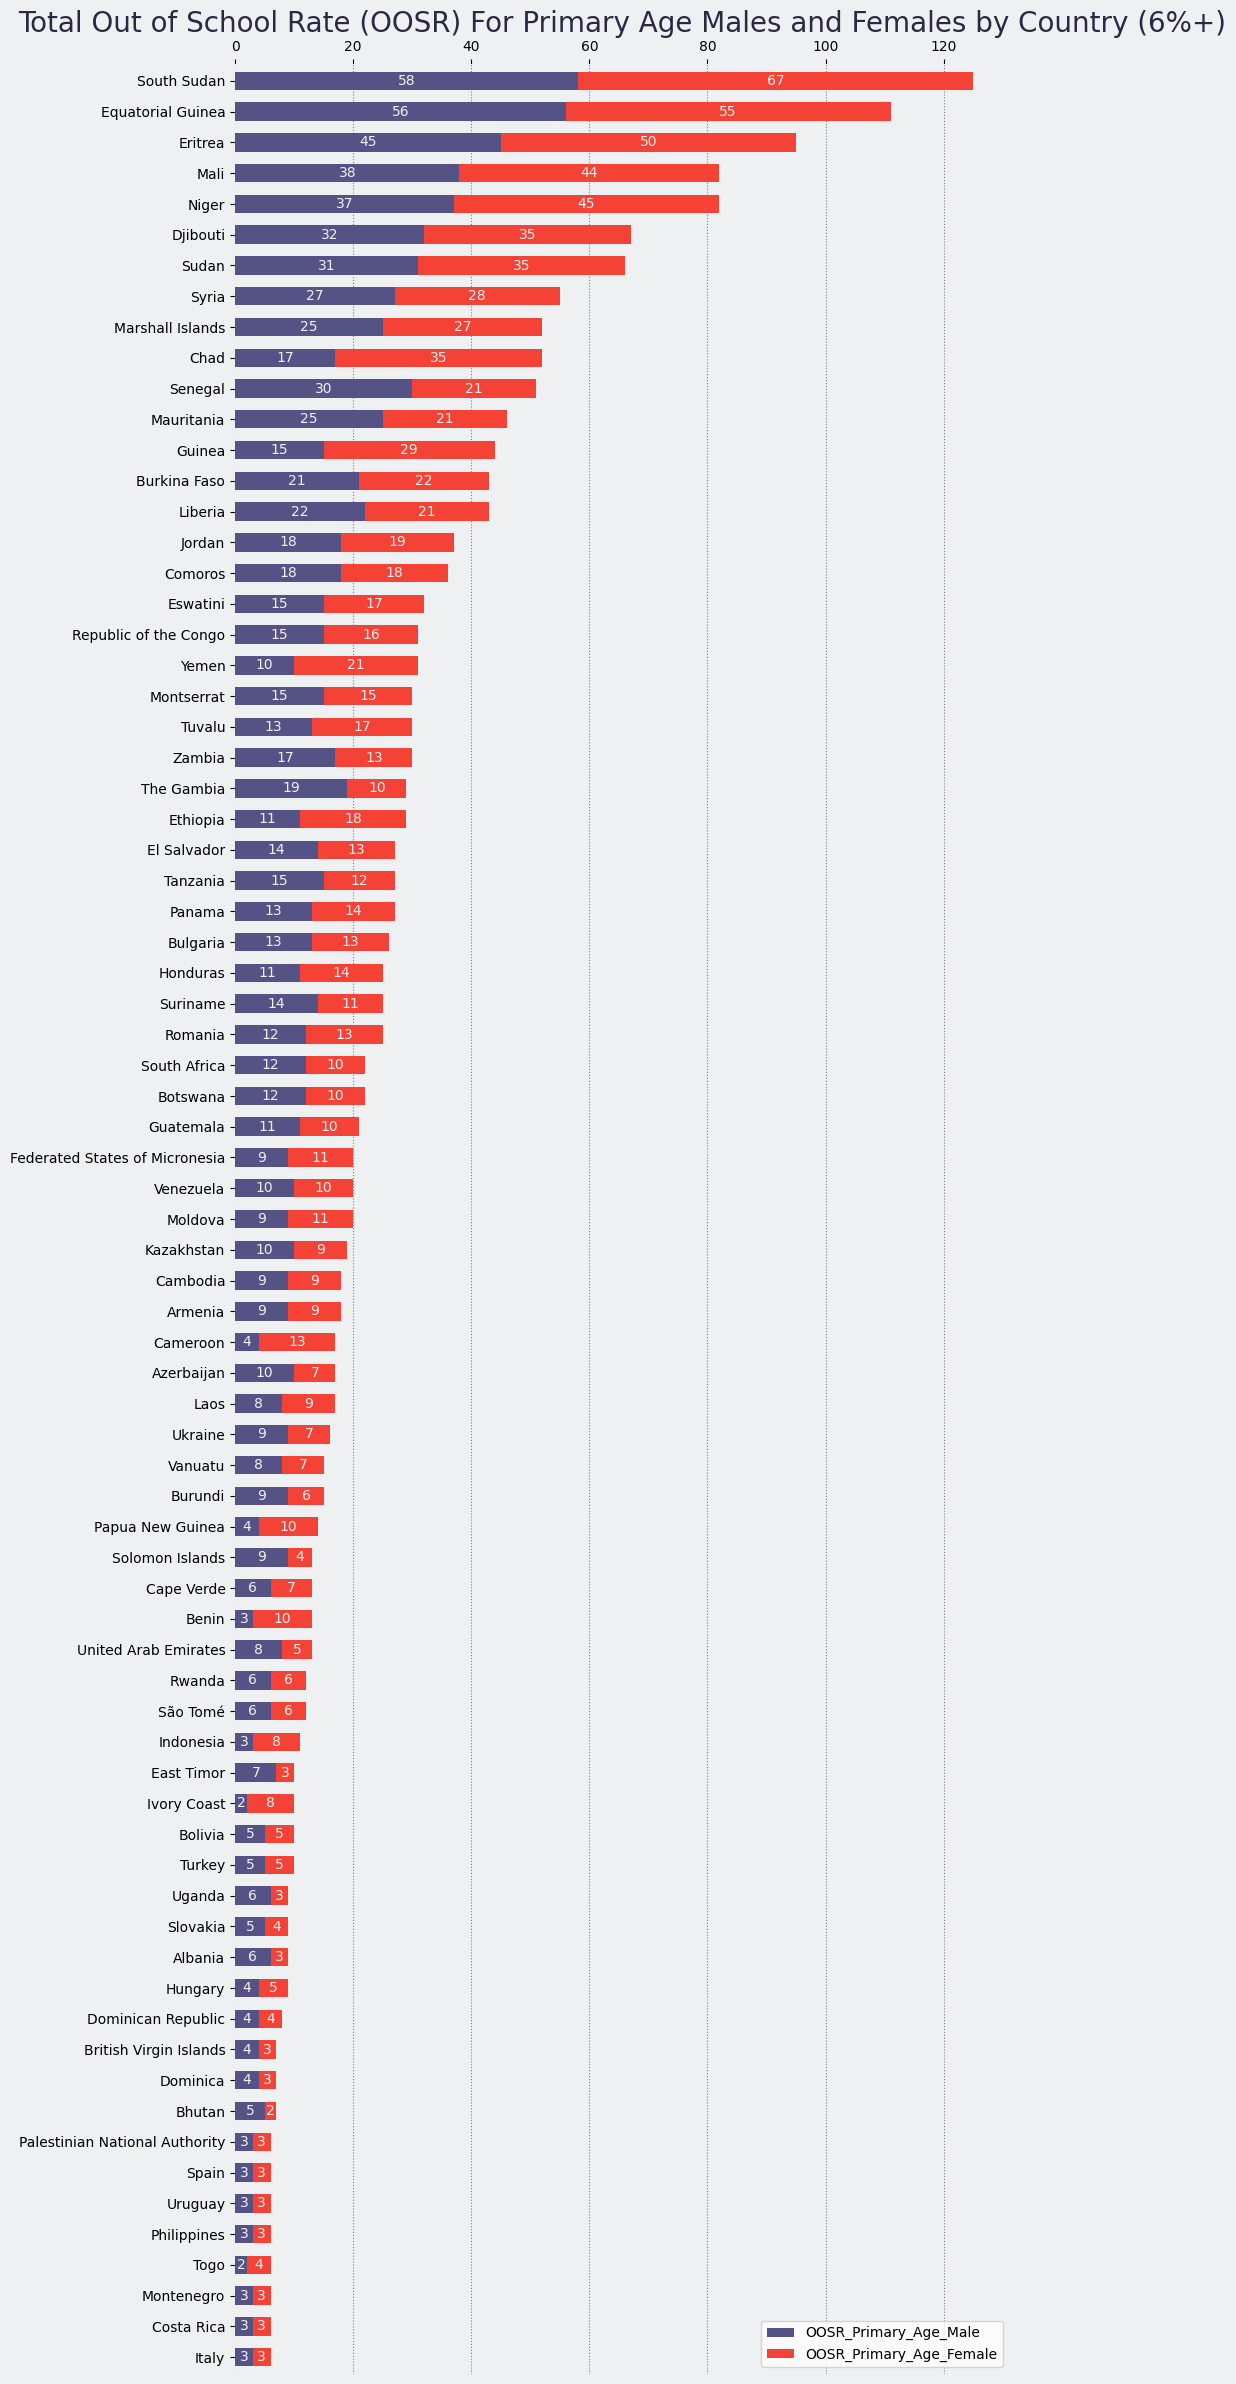

In [99]:
# Add a temporary column for sorting
df["Temp_Total_OOSR"] = df["OOSR_Primary_Age_Male"] + df["OOSR_Primary_Age_Female"]

# Group by countries and sum, then sort based on the temporary total
sorted_df = (
    df.groupby("Countries and areas")[
        ["OOSR_Primary_Age_Male", "OOSR_Primary_Age_Female", "Temp_Total_OOSR"]
    ]
    .sum()
    .sort_values(by="Temp_Total_OOSR", ascending=False)
)

# Drop the temporary column before plotting
sorted_df.drop("Temp_Total_OOSR", axis=1, inplace=True)

# Take the top 75 entries and reverse their order for plotting
sorted_df = sorted_df.head(75).iloc[::-1]

# Plotting
plt.figure(figsize=(10, 30), facecolor="#EFF0F2")
ax = plt.gca()
ax.set_facecolor("#EFF0F2")
for spine in ax.spines.values():
    spine.set_edgecolor("#EFF0F2")

# Move the x-axis to the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

sorted_df.plot(
    kind="barh",
    color=["#555386", "#F44336"],
    stacked=True,
    ax=ax,
    width=0.6,
    zorder=3,
)

plt.title(
    "Total Out of School Rate (OOSR) For Primary Age Males and Females by Country (6%+)",
    color="#282943",
    fontsize=20,
)
plt.grid(axis="x", linestyle=":", zorder=0, color="#857C79")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_y() + p.get_height() / 2,
        f"{int(p.get_width()):,}",
        ha="center",
        va="center",
        fontsize=10,
        color="#EFF0F2",
    )

plt.ylabel("")
ax.legend(loc="best")
plt.show()